In [1]:
'''
Rice grain quality recognition project

tutorial: https://machinelearningmastery.com/how-to-train-an-object-detection-model-with-keras/

dependencies:
matterport/Mask_RCNN: https://github.com/matterport/Mask_RCNN#installation

using venv 

'''

'\nRice grain quality recognition project\n\ntutorial: https://machinelearningmastery.com/how-to-train-an-object-detection-model-with-keras/\n\ndependencies:\nmatterport/Mask_RCNN: https://github.com/matterport/Mask_RCNN#installation\n\nusing venv \n\n'

ERROR! Session/line number was not unique in database. History logging moved to new session 419


In [2]:
import cv2
import os
import json
from mrcnn.utils import Dataset

from matplotlib import pyplot as plt
%matplotlib inline

In [40]:
trainPath = os.getcwd() + '/training/'

def extract_boxes(filename):
    with open(filename) as f:
        ann = json.load(f)
    all_boxes = ann['shapes']
    data = [(shape['label'], shape['points']) for shape in all_boxes]
    return data
    
boxes = extract_boxes(imgPath + 'full.json')

In [42]:
'''
define folder heiarchy as:

training/
- train_labels.csv
- imgs/
    - full.jpg
    - bad.jpg
- annots/
    - full.json
    - bad.json
'''

class riceDataset(Dataset):
    def load_dataset(self, dataset_dir, is_train=True):
        labels = pd.read_csv(dataset_dir + 'train_labels.csv')
        print(labels)
        self.add_class('dataset', 1, 'bad')
        self.add_class('dataset', 2, 'full')
        
        imges_dir = dataset_dir + 'imgs/'
        annotations_dir = dataset_dir + 'annots/'
#     def load_mask(self, image_id):
    
#     def image_reference(self, image_id):

NameError: name 'Dataset' is not defined

In [ ]:
rice_data = riceDataset()
rice_data.load_dataset(trainPath)

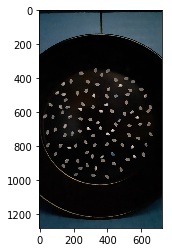

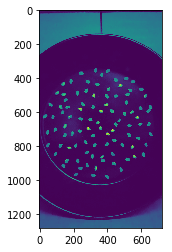

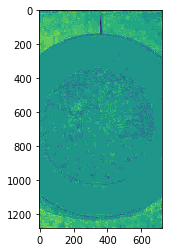

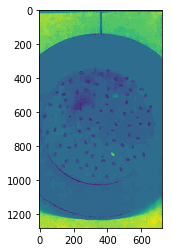

In [13]:
#-----Converting image to LAB Color model----------------------------------- 
lab= cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
plt.imshow(image)
plt.show()

#-----Splitting the LAB image to different channels-------------------------
l, a, b = cv2.split(lab)
plt.imshow(l)
plt.show()
plt.imshow(a)
plt.show()
plt.imshow(b)
plt.show()

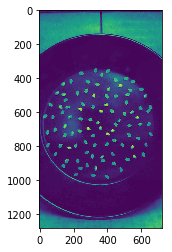

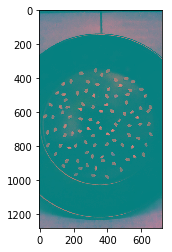

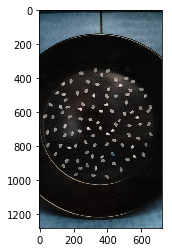

In [15]:


#-----Applying CLAHE to L-channel-------------------------------------------
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl = clahe.apply(l)
plt.imshow(cl)
plt.show()

#-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
limg = cv2.merge((cl,a,b))
plt.imshow(limg)
plt.show()

#-----Converting image from LAB Color model to RGB model--------------------
final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
plt.imshow(final)
plt.show()
